## Орищенко Виталий
## @Vitosh992

In [442]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Загрузка исходных данных

In [443]:
df = pd.read_csv("https://raw.githubusercontent.com/Vitosh992/ArchitectureAIOrischenko/master/dataset_tk.csv") # Загружаем данные методом read_csv из прямой ссылки на сырые данные файлы GitHub.
df

,Unnamed: 0,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
0,02/01/2019 00:00:00,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
1,03/01/2019 00:00:00,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6
2,04/01/2019 00:00:00,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5
3,05/01/2019 00:00:00,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,...,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5
4,06/01/2019 00:00:00,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,...,62.9,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,01/12/2020 00:00:00,130.8,126.0,220.4,77.3,322.8,36.5,25.4,45.4,3.6,...,105.7,172.6,1.4,2.1,20.4,2.1,5.4,1.8,2.0,2.4
499,02/12/2020 00:00:00,129.4,127.3,218.4,81.3,331.4,37.0,25.8,45.2,3.7,...,112.3,174.4,1.5,2.1,23.3,2.4,5.4,1.6,2.1,3.3
500,03/12/2020 00:00:00,132.1,129.7,205.6,85.6,336.7,37.8,26.2,45.2,4.0,...,113.0,169.8,1.4,2.1,21.7,2.3,5.4,1.5,2.0,3.6
501,04/12/2020 00:00:00,132.1,128.4,207.0,83.9,334.6,38.2,27.0,43.0,4.0,...,111.6,145.5,1.2,2.0,24.2,2.5,5.7,1.6,2.0,3.3


# Преобразование данных для будущего анализа

In [444]:
df = df.rename(columns = {'Unnamed: 0' : 'DateTime', # Преобразуем столбец с датой и временем в правильное название
                          'J&K' : 'JK',  # В остальных столбцах убираем спецсимволы и пробелы, чтобы облегчить взаимодействие с ними в будущем.
                          'Andhra Pradesh' : 'AndhraPradesh',
                          'Tamil Nadu' : 'TamilNadu',
                          'West Bengal' : 'WestBengal',
                          'Arunachal Pradesh' : 'ArunachalPradesh' })

# Проверка количества пропусков по каждому столбцу

In [445]:
print(df.isnull().sum()) # Проверяем количество пропущенных данных по каждому столбцу.
# Как мы видим, пропусков нет, значит, можем идти дальше.

DateTime            0
Punjab              0
Haryana             0
Rajasthan           0
Delhi               0
UP                  0
Uttarakhand         0
HP                  0
JK                  0
Chandigarh          0
Chhattisgarh        0
Gujarat             0
MP                  0
Maharashtra         0
Goa                 0
DNH                 0
AndhraPradesh       0
Telangana           0
Karnataka           0
Kerala              0
TamilNadu           0
Pondy               0
Bihar               0
Jharkhand           0
Odisha              0
WestBengal          0
Sikkim              0
ArunachalPradesh    0
Assam               0
Manipur             0
Meghalaya           0
Mizoram             0
Nagaland            0
Tripura             0
dtype: int64


In [446]:
# После проведения обзора рассматриваемого датасета было выявлено, что имеются некоторые дубликаты данных в параметре даты.
# Было решено удалить эти редкие значения, так как учитывая выборку они врятли повлияют на результаты исследований.
df.drop_duplicates(subset = 'DateTime', keep='first', inplace = True)

# Описательная статистика каждого параметра

In [447]:
df.iloc[:, 0:10].describe() # Можно находить отдельные статистики, используя именно Numpy,
# но гораздо информативнее использовать метод describe() из Pandas, которые собирает воедино все важные статистики сразу.
# Чтобы отобразить статистики по каждому столбцу, применим срезы и разделим их на 4 группы

,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,JK,Chandigarh
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000
mean,141.651807,138.726506,218.791968,83.609237,314.426707,36.248394,26.639357,44.261847,4.153414
std,57.025863,38.076316,27.233877,25.943535,66.726124,6.654075,4.732628,4.791734,1.142361
min,56.100000,64.800000,105.800000,41.800000,186.800000,16.800000,11.800000,17.800000,2.200000
25%,104.325000,115.025000,206.425000,63.600000,263.375000,33.925000,25.700000,41.500000,3.300000
50%,118.800000,127.100000,223.150000,73.100000,290.000000,37.000000,28.000000,44.100000,3.800000
75%,163.575000,158.650000,237.750000,106.300000,370.600000,40.400000,29.700000,47.400000,4.900000
max,300.000000,237.200000,278.000000,147.100000,471.800000,53.200000,34.000000,54.200000,7.400000


In [448]:
df.iloc[:, 10:20].describe()

,Chhattisgarh,Gujarat,MP,Maharashtra,Goa,DNH,AndhraPradesh,Telangana,Karnataka,Kerala
count,498.00000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000
mean,83.97751,323.356024,208.306426,431.766265,11.101406,16.503414,176.208032,187.239960,204.197390,72.202610
std,10.12776,38.499576,31.143190,42.393512,1.514736,4.486354,15.937980,29.627185,30.269971,6.920457
min,37.20000,192.300000,131.800000,305.600000,6.200000,1.300000,130.600000,130.500000,121.000000,55.000000
25%,75.80000,303.425000,182.625000,401.600000,10.200000,17.500000,163.625000,165.525000,182.300000,67.000000
50%,82.75000,325.800000,209.500000,429.350000,11.450000,18.200000,174.700000,181.850000,205.300000,71.450000
75%,91.77500,346.125000,230.275000,463.950000,12.200000,18.600000,191.225000,210.950000,228.600000,76.575000
max,111.60000,400.800000,272.300000,522.100000,14.000000,19.500000,205.100000,256.200000,273.300000,89.400000


In [449]:
df.iloc[:, 20:30].describe()

,TamilNadu,Pondy,Bihar,Jharkhand,Odisha,WestBengal,Sikkim,ArunachalPradesh,Assam,Manipur
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000
mean,301.047390,7.483936,83.289759,23.856627,80.589960,139.033133,1.288554,2.113454,25.025703,2.495984
std,35.473961,1.130492,14.946056,1.960938,10.859139,27.779186,0.365198,0.225622,4.695653,0.223526
min,195.700000,4.000000,43.500000,17.400000,51.100000,51.500000,0.300000,1.100000,12.200000,1.500000
25%,277.825000,7.000000,71.750000,22.800000,71.825000,115.025000,1.100000,2.100000,22.100000,2.400000
50%,302.350000,7.500000,78.650000,23.900000,79.850000,131.550000,1.200000,2.200000,23.500000,2.500000
75%,330.575000,8.300000,95.575000,25.075000,88.400000,164.800000,1.400000,2.200000,27.600000,2.600000
max,365.400000,9.700000,121.400000,28.900000,113.000000,198.500000,2.800000,2.700000,38.000000,3.200000


In [450]:
df.iloc[:, 30:35].describe()

,Meghalaya,Mizoram,Nagaland,Tripura
count,498.000000,498.000000,498.000000,498.000000
mean,5.652811,1.707631,2.163454,4.093173
std,0.708047,0.143617,0.144621,0.750529
min,3.300000,1.200000,1.400000,1.400000
25%,5.300000,1.600000,2.100000,3.500000
50%,5.800000,1.700000,2.200000,3.900000
75%,6.100000,1.800000,2.200000,4.600000
max,6.900000,2.200000,2.700000,6.600000


## Вывод
Можно заметить, что данные по каждому региону сильно отличаются не только количественно, но и качественно. Относительный разброс данных везде разный, это говорит об огромном количестве факторов, влияющих на выборку.

# Гистограммы распределения по наждому штату

<Axes: ylabel='Frequency'>

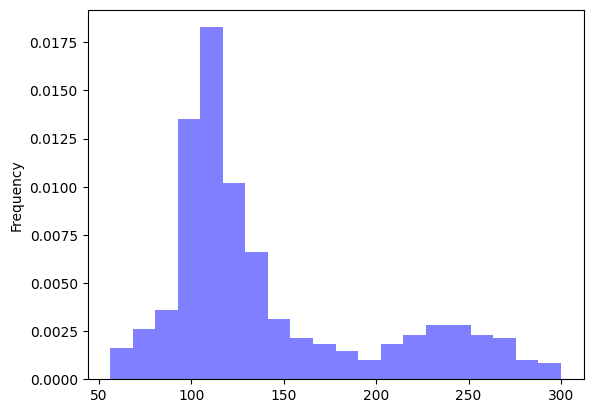

In [451]:
# Для проведения анализа на выбросы построим для каждого параметра гистограмму распределения.
# На каждом графике можно сразу будет увидеть необходимую информацию по параметру и тенденции.
# Так как график гистограммы достаточно прост, будем использовать встроенные возможности библиотеки Pandas.
df.Punjab.plot(kind='hist', density=1, bins=20, stacked=False, alpha=.5, color='blue')
# Для штата Punjab нет аномальных значений, но большой разброс расходов электроэнергии на разные даты (от 60 до 300).
# Биомодальный тип графика (пики 120, 240).

<Axes: ylabel='Frequency'>

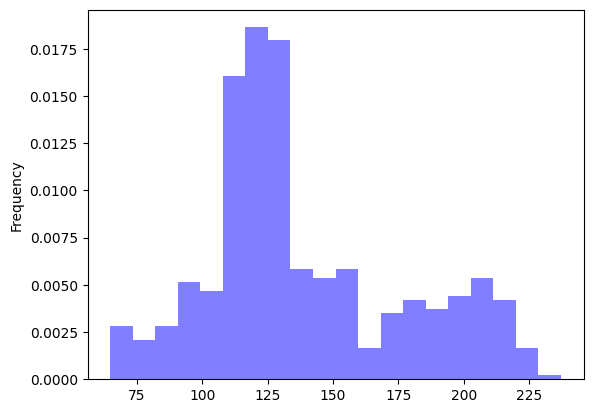

In [452]:
df.Haryana.plot(kind='hist', density=1, bins=20, stacked=False, alpha=.5, color='blue')
# Аналогичная ситуация для штата Haryana. Разбор тоже существенный, но меньше (60-240).
# Биомодальный тип гистограммы (пики 125 и 210).

<Axes: ylabel='Frequency'>

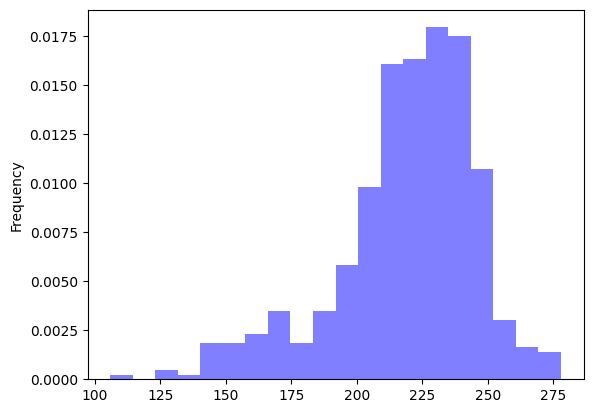

In [453]:
df.Rajasthan.plot(kind='hist', density=1, bins=20, stacked=False, alpha=.5, color='blue')
# Для штата Rajasthan имеются аномально низкие значения (до 150).
# Колокольный тип графика. Имеются аномальные выбросы (до 140).

<Axes: ylabel='Frequency'>

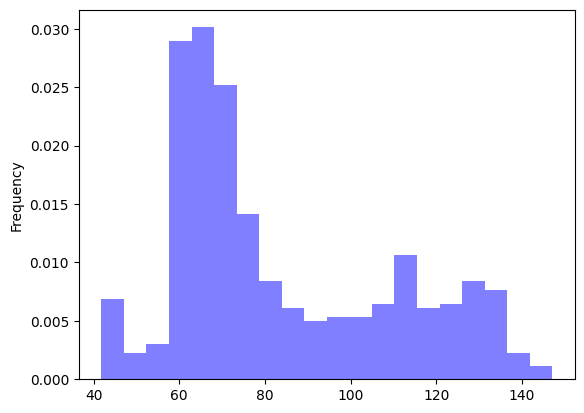

In [454]:
df.Delhi.plot(kind='hist', density=1, bins=20, stacked=False, alpha=.5, color='blue')
# Для штата Delhi имеется небольшой разброс значений (40-150) и неявные аномальные значения.
# Тип гистограммы случайная (или мультимодальная). Основной пик 70, дополнительные 45, 110, 130.

<Axes: ylabel='Frequency'>

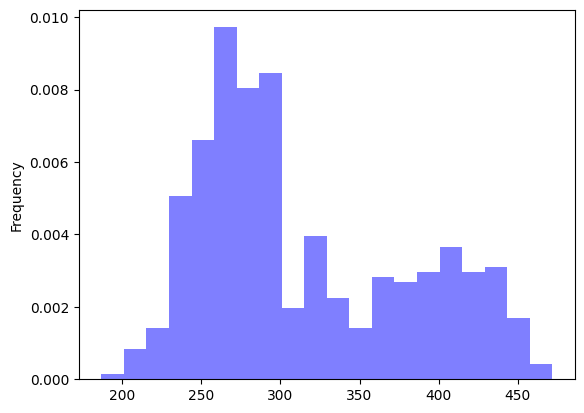

In [455]:
df.UP.plot(kind='hist', density=1, bins=20, stacked=False, alpha=.5, color='blue')
# Для штата UP большой разброс значений (175-475).
# Слабовыраженная биомодальном гистограммы (пики 270 и 420).

<Axes: ylabel='Frequency'>

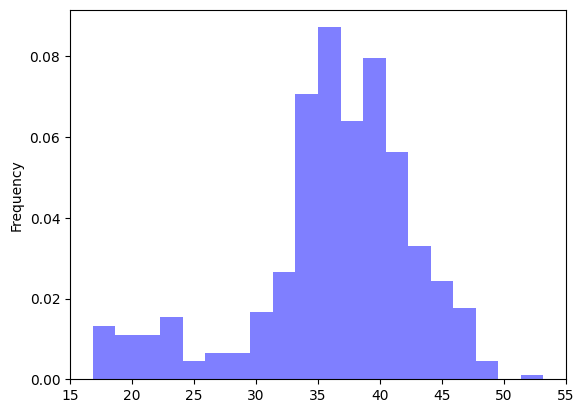

In [456]:
df.Uttarakhand.plot(kind='hist', density=1, bins=20, stacked=False, alpha=.5, color='blue')
# Для штата Uttarakhand небольшой разброс значений и данные распределены обычно.
# Биомодальный вид графика (пики 20 и 37).

<Axes: ylabel='Frequency'>

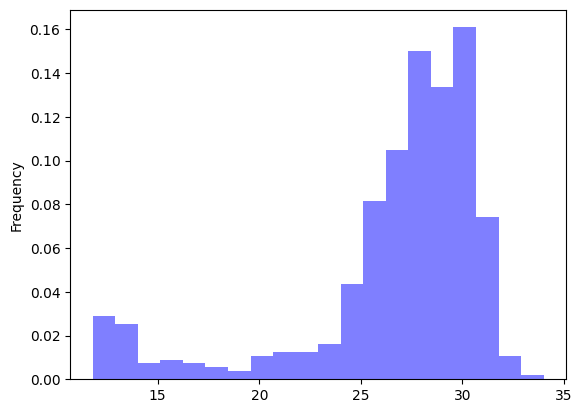

In [457]:
df.HP.plot(kind='hist', density=1, bins=20, stacked=False, alpha=.5, color='blue')
# Ярко выраженный биомодальный вид графика (пики 10 и 30). Разброс небольшой.

<Axes: ylabel='Frequency'>

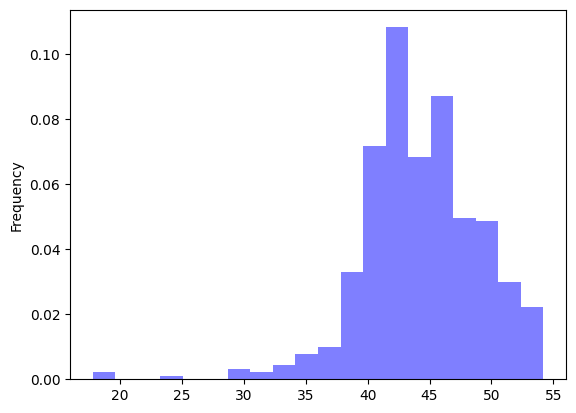

In [458]:
df.JK.plot(kind='hist', density=1, bins=20, stacked=False, alpha=.5, color='blue')
# Для штата JK небольшой разброс данных (30-53), имеются аномально низкие значения (до 30).
# Неярковыраженный колокольный тип графика (пик 45).

<Axes: ylabel='Frequency'>

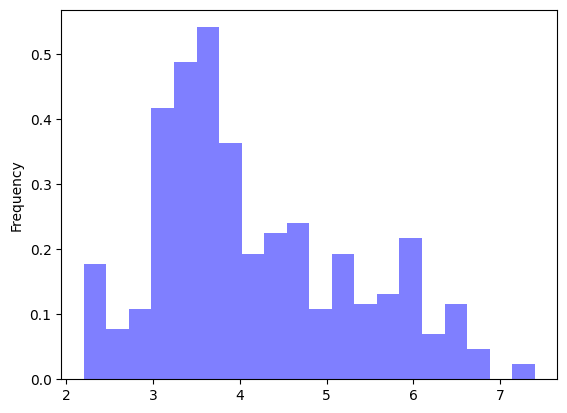

In [459]:
df.Chandigarh.plot(kind='hist', density=1, bins=20, stacked=False, alpha=.5, color='blue')
# Для штата Chandigarph крайне низкий разброс (2.3 - 7.2), есть небольшие аномальные значения (больше 7).
# Мультимодальный тип графика с основным пиком (3.5) и дополнительными (2.2, 4.5, 5.2, 6).

<Axes: ylabel='Frequency'>

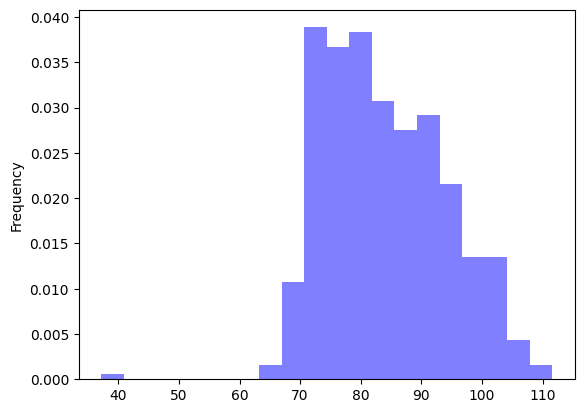

In [460]:
df.Chhattisgarh.plot(kind='hist', density=1, bins=20, stacked=False, alpha=.5, color='blue')
# Для штата Chhattisgarph диаграмма перекошена вправо. Имеются аномальные выбросы (до 60) и средний разброс (от 62 до 110).

<Axes: ylabel='Frequency'>

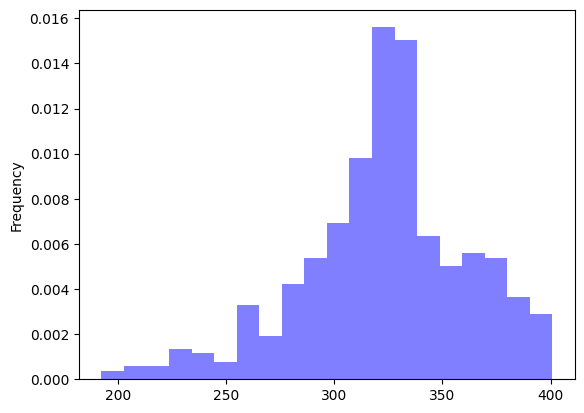

In [461]:
df.Gujarat.plot(kind='hist', density=1, bins=20, stacked=False, alpha=.5, color='blue')
# Для региона Gujarat средний уровень разброса (от 180 до 400), отсутствие выбросов.
# Тип гистограммы неявный колокольный с пиком в 330.

<Axes: ylabel='Frequency'>

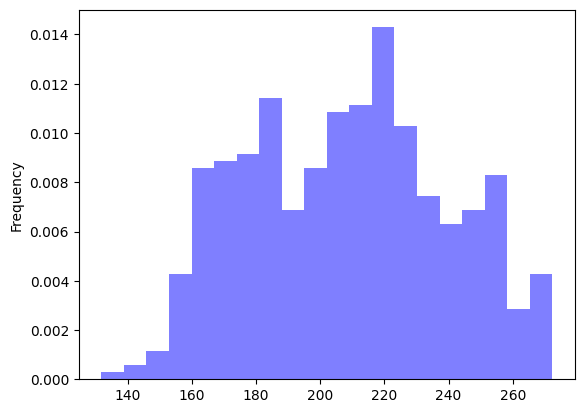

In [462]:
df.MP.plot(kind='hist', density=1, bins=20, stacked=False, alpha=.5, color='blue')
# Для штата MP небольшой разброс данных (120-270), неярко выраженные выбросы (более 260).
# Тип графика мультимодальный (пики 190, 220, 250).

<Axes: ylabel='Frequency'>

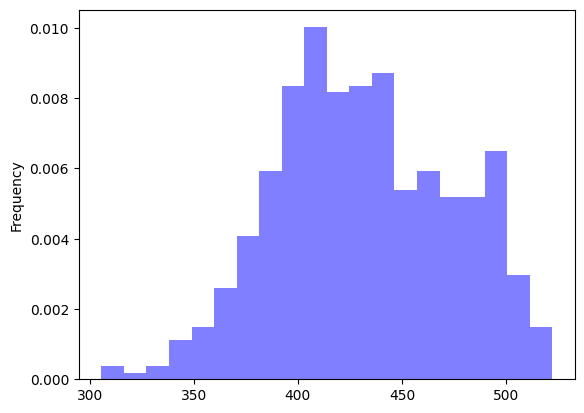

In [463]:
df.Maharashtra.plot(kind='hist', density=1, bins=20, stacked=False, alpha=.5, color='blue')
# Для штата Maharashtra разброс данных (310-530), слабовыраженные аномальные значения (до 320).
# Тип графика преимущественно колокольный (основной пик 410) с дополнительной модальностью (пик 500).

<Axes: ylabel='Frequency'>

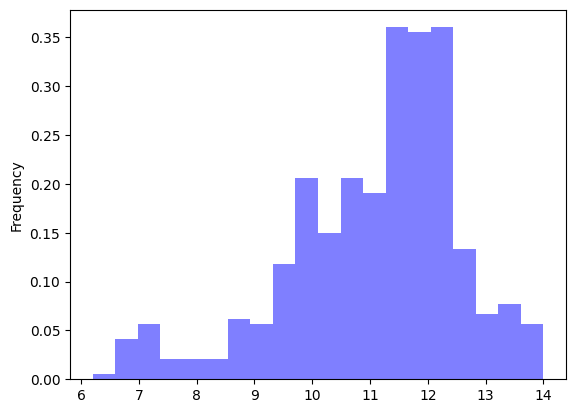

In [464]:
df.Goa.plot(kind='hist', density=1, bins=20, stacked=False, alpha=.5, color='blue')
# Для штата Goa средний разброс данных (6.2 - 14). Выбросов нет.
# Мультимодальный вид графика (основной пик - 12, дополнительные - 7, 10, 11).

<Axes: ylabel='Frequency'>

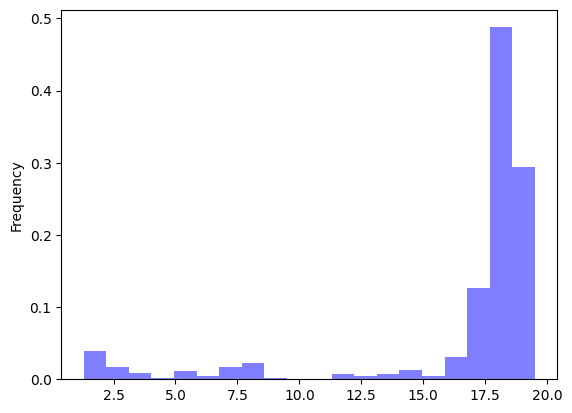

In [465]:
df.DNH.plot(kind='hist', density=1, bins=20, stacked=False, alpha=.5, color='blue')
# Для штата DNH устойчивые аномальные значения, беспорядочность распределения данных (до 16).
# Тип графика колокольный (пик 17.5).

<Axes: ylabel='Frequency'>

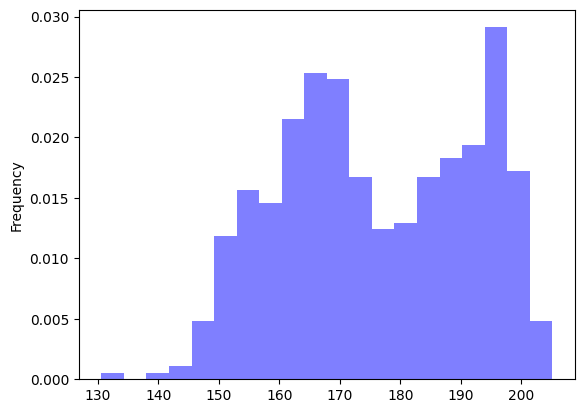

In [466]:
df.AndhraPradesh.plot(kind='hist', density=1, bins=20, stacked=False, alpha=.5, color='blue')
# Для штата Andhra Pradesh имеются выбросы данных (до 140), небольшой разброс данных (140-210).
# Тип графика мультимодальный (пики 165 и 200).

<Axes: ylabel='Frequency'>

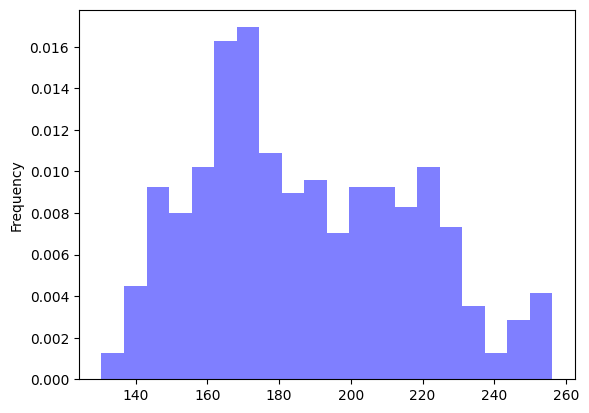

In [467]:
df.Telangana.plot(kind='hist', density=1, bins=20, stacked=False, alpha=.5, color='blue')
# Для штата Telangana средний разброс данных (130-250), отстутствие выбросов.
# Тип графика колокольный (пик 170) с неярковыраженными дополнительными пиками (150, 220, 250).

<Axes: ylabel='Frequency'>

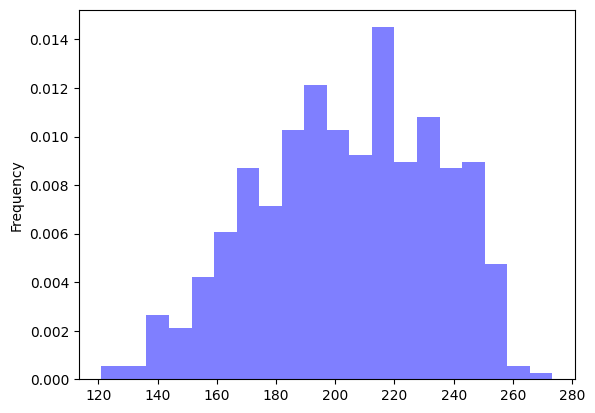

In [468]:
df.Karnataka.plot(kind='hist', density=1, bins=20, stacked=False, alpha=.5, color='blue')
# Для штата Karnataka средний разброс данных (120-270), выбросов нет.
# Мультимодальный тип графика (пики 170, 190, 220, 230).

<Axes: ylabel='Frequency'>

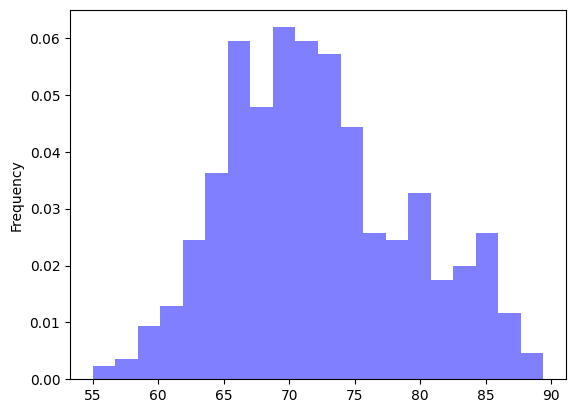

In [469]:
df.Kerala.plot(kind='hist', density=1, bins=20, stacked=False, alpha=.5, color='blue')
# Для штата Kerala низкий разброс данных (55-88), отсутствие выбросов.
# Колокольный тип графика (пик 72) с неярковыраженной дополнительной модальностью (пики 65, 80, 85).

<Axes: ylabel='Frequency'>

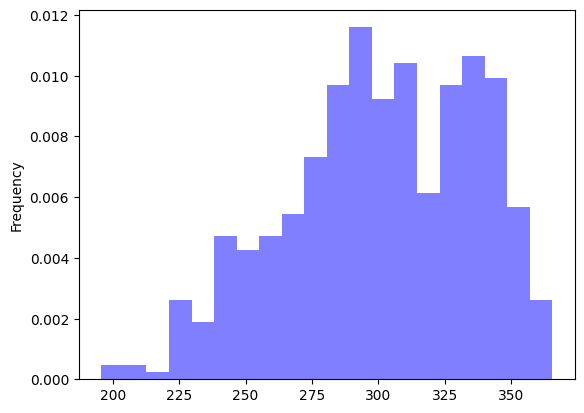

In [470]:
df.TamilNadu.plot(kind='hist', density=1, bins=20, stacked=False, alpha=.5, color='blue')
# Для штата TamilNadu Средний разброс данных (190-360), небольшие выбросы (до 225).
# График перекошен вправо с двумя основными пиками (280 и 330).

<Axes: ylabel='Frequency'>

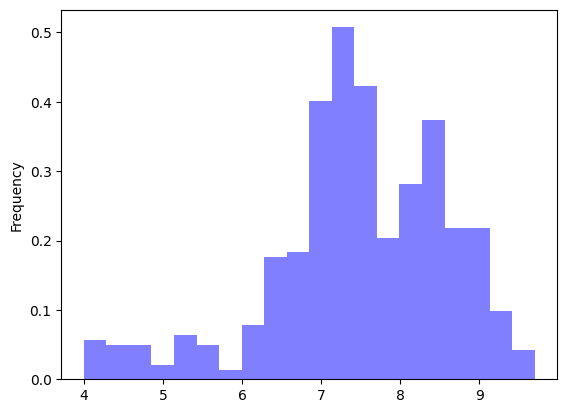

In [471]:
df.Pondy.plot(kind='hist', density=1, bins=20, stacked=False, alpha=.5, color='blue')
# Для штата Pondy средний разброс данных (от 4 до 9.7), небольшие аномалии (до 60).
# График перекошен вправно с двумя пиками (7 и 8.5).

<Axes: ylabel='Frequency'>

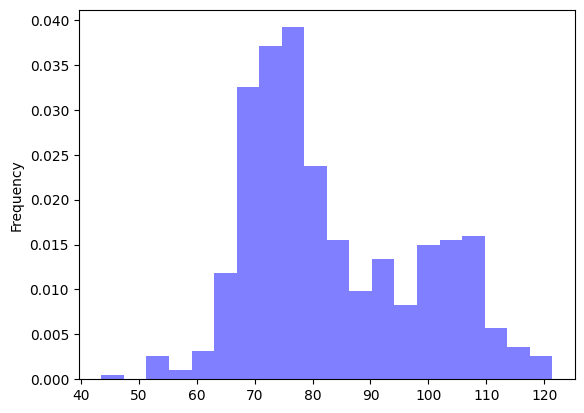

In [472]:
df.Bihar.plot(kind='hist', density=1, bins=20, stacked=False, alpha=.5, color='blue')
# Для штата Bihar большой разброс данных (от 42 до 120), присутствуют выбросы (до 50).
# Тип графика перекошен влево с двумя пиками (80 и 105).

<Axes: ylabel='Frequency'>

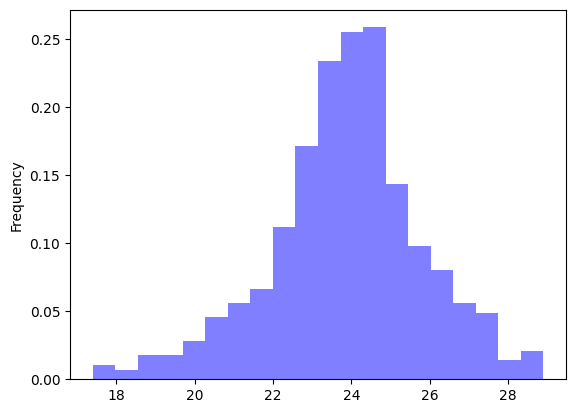

In [473]:
df.Jharkhand.plot(kind='hist', density=1, bins=20, stacked=False, alpha=.5, color='blue')
# Для штата Jharkhand средний разброс данных (от 17 до 29), отстутствуют выбросы.
# Тип графика явный колокольный (пик 24.5).

<Axes: ylabel='Frequency'>

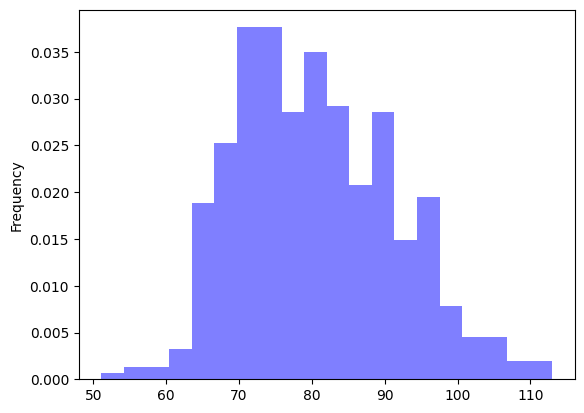

In [474]:
df.Odisha.plot(kind='hist', density=1, bins=20, stacked=False, alpha=.5, color='blue')
# Для штата Odisha средний разброс данных (от 52 до 114), отсутствуют выбросы.
# Тип графика мультимодальный (пики 74, 81, 90, 97).

<Axes: ylabel='Frequency'>

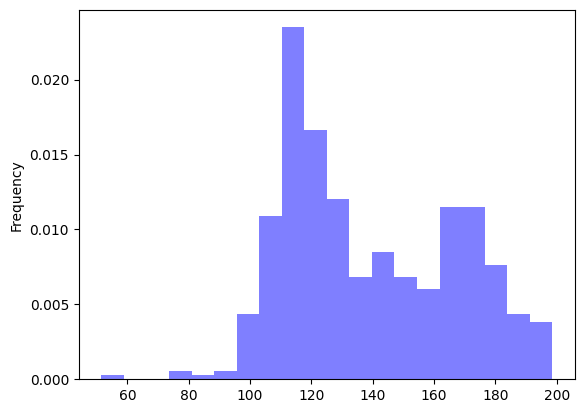

In [475]:
df.WestBengal.plot(kind='hist', density=1, bins=20, stacked=False, alpha=.5, color='blue')
# Для штата West Bengal средний разброс данных (от 70 до 195), присутствуют выбросы (до 70).
# График перекош вправо с основным пиком (115) и допольнительным (170).

<Axes: ylabel='Frequency'>

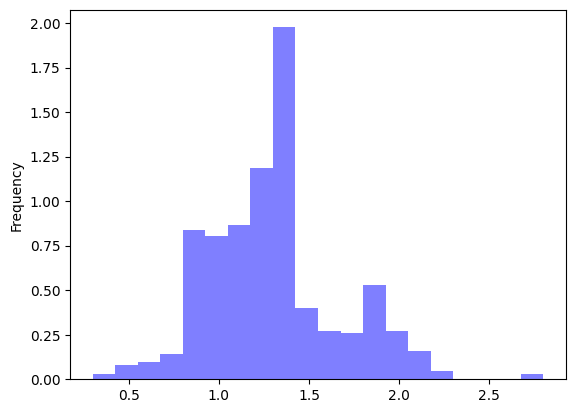

In [476]:
df.Sikkim.plot(kind='hist', density=1, bins=20, stacked=False, alpha=.5, color='blue')
# Для штата Sikkim большой разброс данных (от 0.3 до 2.25), имеются выбросы (выше 2.5).
# График перекошен вправо с основным пиком (1.4) и дополнительным (1.8).

<Axes: ylabel='Frequency'>

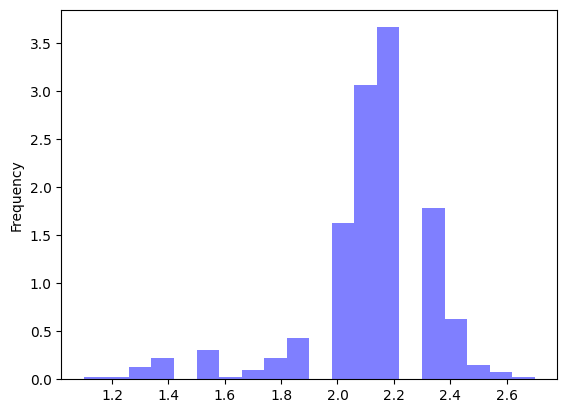

In [477]:
df.ArunachalPradesh.plot(kind='hist', density=1, bins=20, stacked=False, alpha=.5, color='blue')
# Для штата Arunachal Pradesh средний разброс данных (от 1.1 от 2.7), присутствуют выбросы (до 1.6).
# График неоднородный, в промежутке (2.2-2.3) отсутствуют данные, основной пик 2.1.

<Axes: ylabel='Frequency'>

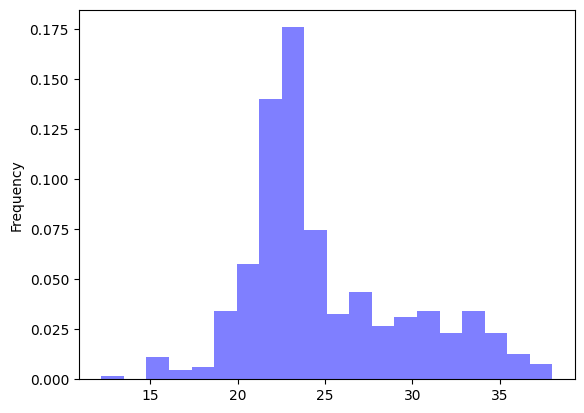

In [478]:
df.Assam.plot(kind='hist', density=1, bins=20, stacked=False, alpha=.5, color='blue')
# Для штата Assam большой разброс данных (от 12 до 38), отстутствуют выбросы.
# График перекошен вправо с основным пиком (23).

<Axes: ylabel='Frequency'>

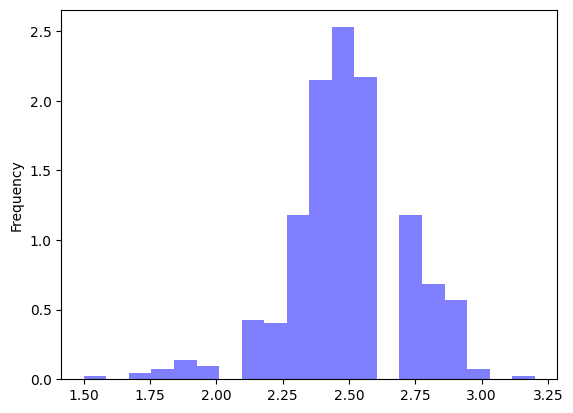

In [479]:
df.Manipur.plot(kind='hist', density=1, bins=20, stacked=False, alpha=.5, color='blue')
# Для штата Manipur средний разброс данных (от 2.1 до 3.05), присутствуют выбросы (до 20 и более 3.1).
# График неоднородный, на промежутке (2.55 - 2.7) отсутствуют данные, основной пик - 2.5.

<Axes: ylabel='Frequency'>

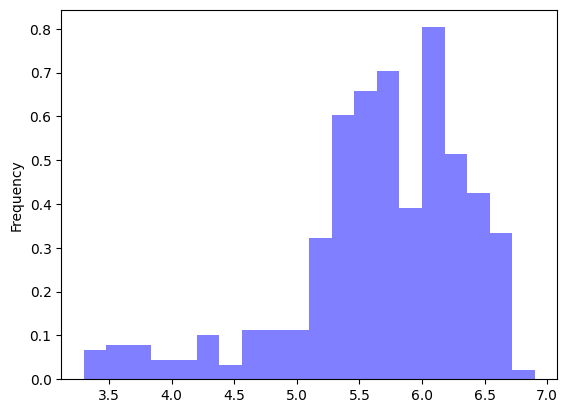

In [480]:
df.Meghalaya.plot(kind='hist', density=1, bins=20, stacked=False, alpha=.5, color='blue')
# Для штата Meghalaya средний разброс данных (от 3.4 до 6.7), отсутствуют выбросы.
# График перекошен влево, основно пик - 6.2, дополнительный 5.8.

<Axes: ylabel='Frequency'>

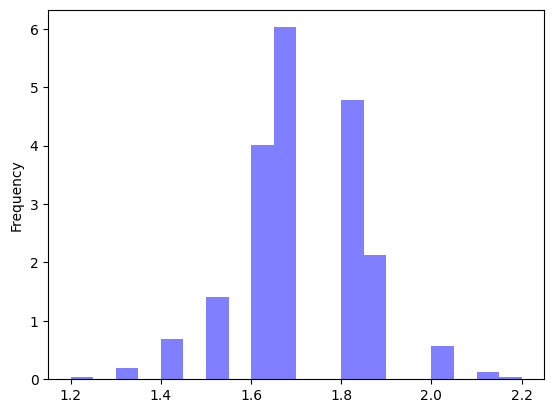

In [481]:
df.Mizoram.plot(kind='hist', density=1, bins=20, stacked=False, alpha=.5, color='blue')
# Для штата Mizoram средний разброс данных (от 1.2 до 2.2), отстутсвуют выбросы.
# График явно однородный, пик 1.7, присутствует множество пропусков данных.

<Axes: ylabel='Frequency'>

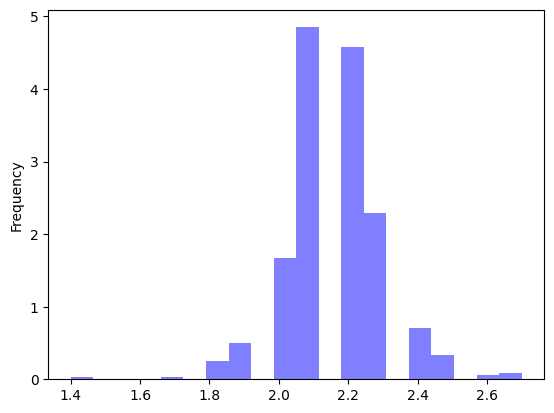

In [482]:
df.Nagaland.plot(kind='hist', density=1, bins=20, stacked=False, alpha=.5, color='blue')
# Для штата Nagaland средний разброс данных (от 1.8 до 2.5), присутствуют выбросы (до 1.8 и более 2.5).

<Axes: ylabel='Frequency'>

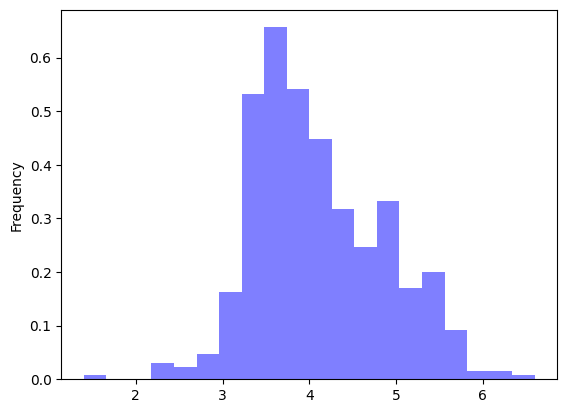

In [483]:
df.Tripura.plot(kind='hist', density=1, bins=20, stacked=False, alpha=.5, color='blue')
# Для штата Tripura большой разброс данных (от 2.2 до 6.3), присутствуют выбросы (до 2).
# График перекошен вправо, основной пик - 3.5.

## Вывод
Можно сделать вывод из полученных гистограмм, что для каждого штата ситуация с расходом индивидуальная, слишком много факторов влияет на распределение по дням. Графики гистограмм абсолютно разные по форме. В некоторых штатах были свои особенности расхода электроэнергии из-за, например, промышленности или законодательных норм, влияющих на расход (например, муниципальные ограничения при пандемии). Для более подробного анализа необходимо больше данных.

# Графики показателей по каждому штату по параметру DateTime

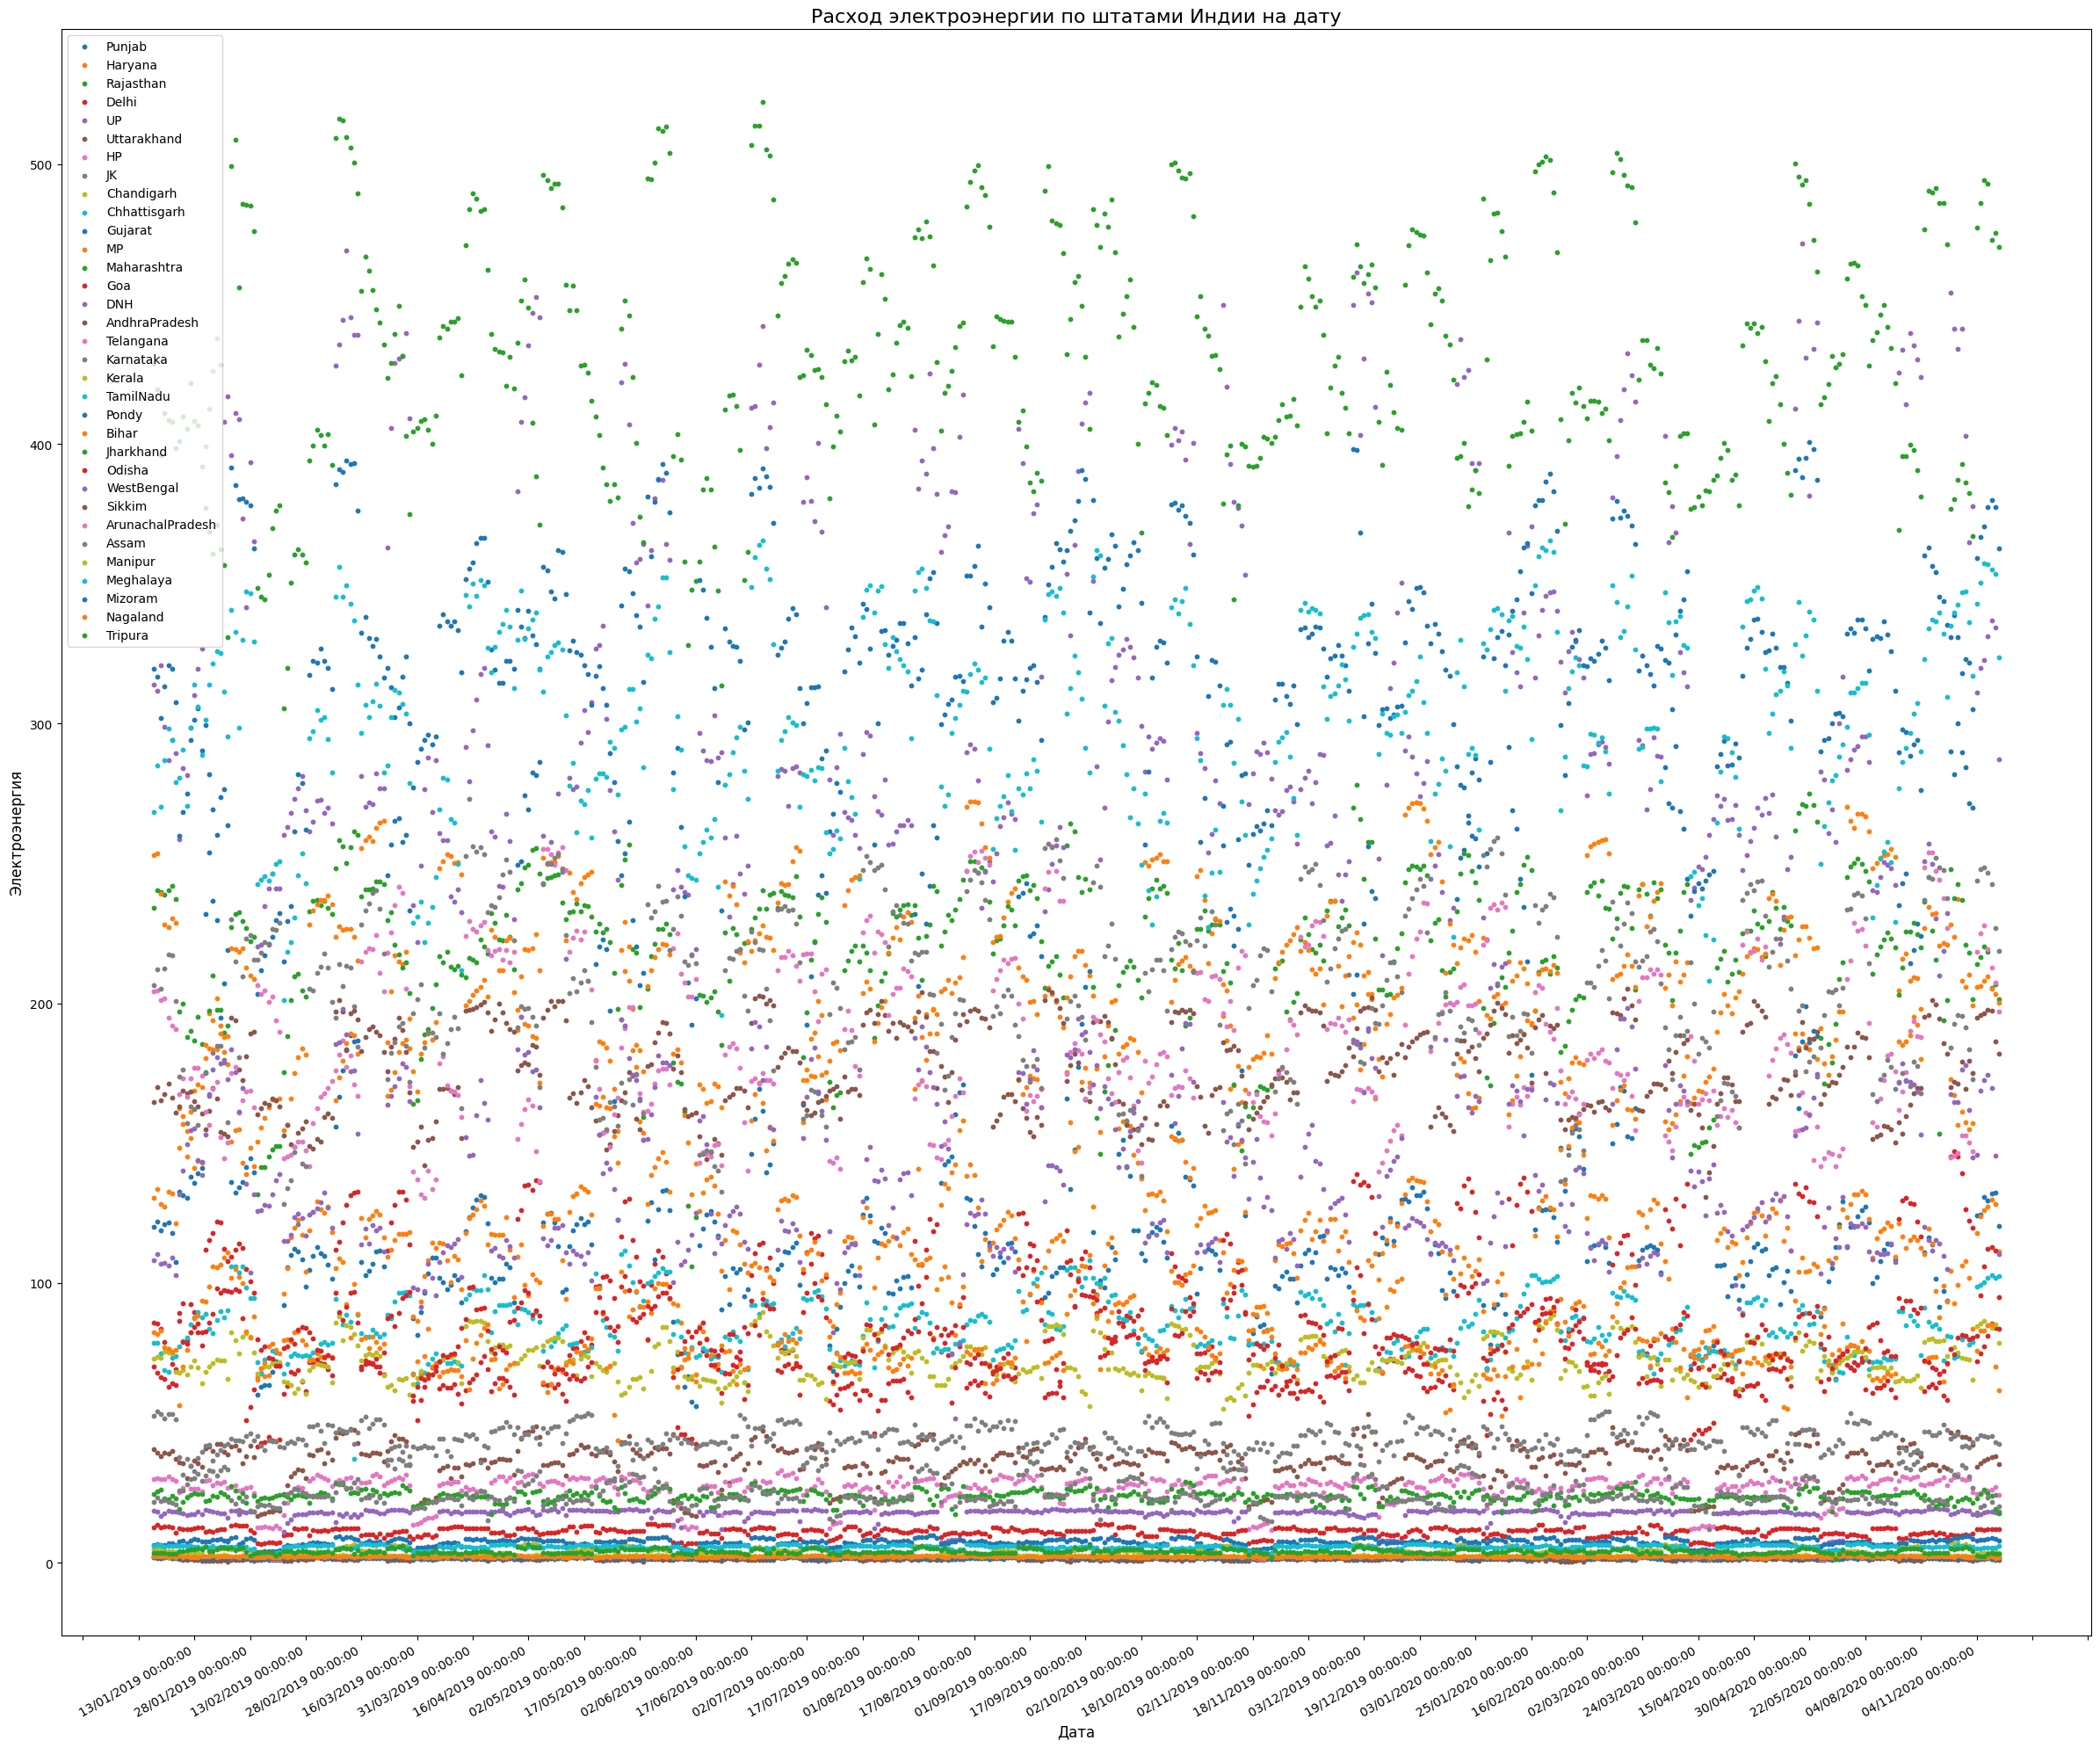

In [484]:
# Устанавливаем столбец DateTime как индекс
df.set_index('DateTime', inplace=True)
plt.figure(figsize=(24, 20))  # Размер графика (ширина, высота)

# Так как у нас на данном графике будет достаточно много информации,
# для лучшей визуальной интерпретации применим добавление случайного шума к данным.
for column in df.columns:
    noise = np.random.normal(0, 0.1, size=len(df))  # Генерация случайного шума
    plt.scatter(df.index, df[column] + noise, label=column, s=10)

plt.title('Расход электроэнергии по штатами Индии на дату', fontsize=16)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Электроэнергия', fontsize=12)
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))
plt.gcf().autofmt_xdate()  # Поворачиваем метки на оси времени для лучшей читаемости
plt.grid(False)
plt.tight_layout()

plt.show()




## Вывод
На данном графике сложно выявить тенденции и выводы, так как информации достаточно много. Единственное, можно сказать, что для каждого региона Индии есть определенная зона расходов электроэнергии и нет аномальных выходов из этой зоны (например, в 4-5 раз выше среднего). Если внимательно приглядется, можно увидеть некоторую сезонную зависимость для некоторых регионов. Зимой и летом расходы выше, чем осенью и весной.

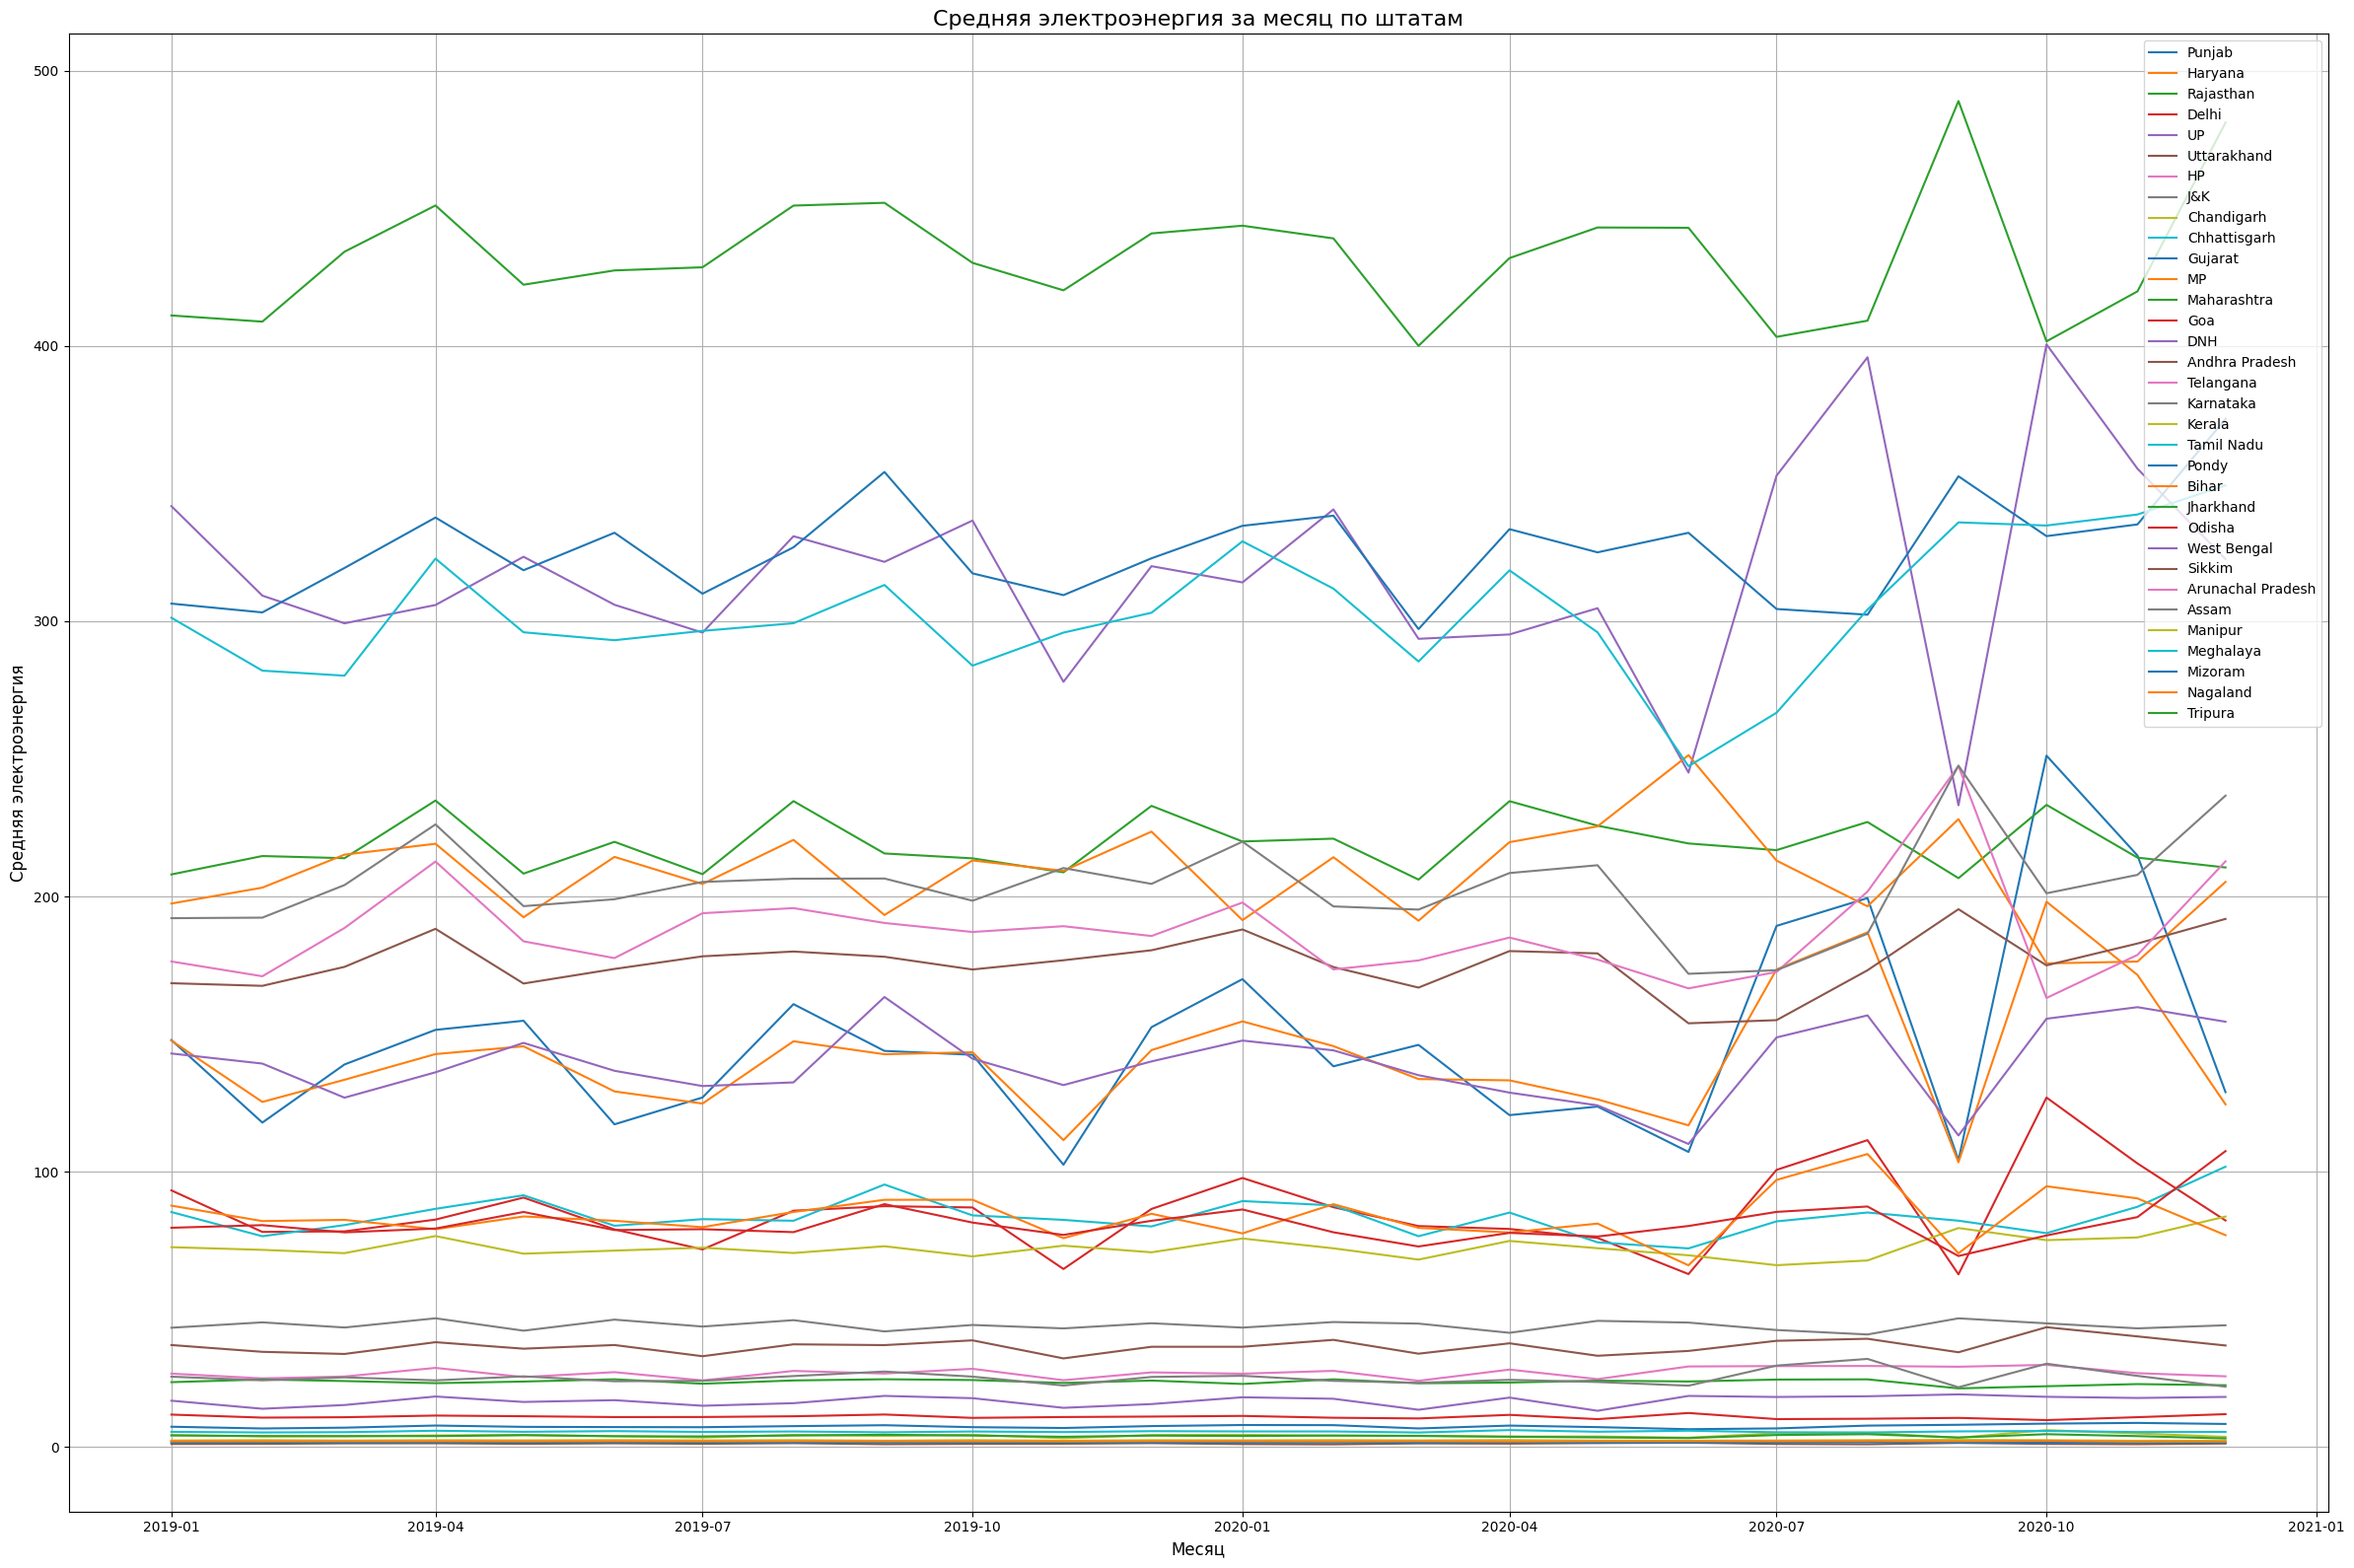

In [485]:
# Для следующего исследования создадим другой dataFrame, в который заново загрузим данные.
# Мы будем строить график по среднемесячному расходу электроэнергии по штатам.
# Так как мы все-равно будем находить среднее, то нет смысла брать преобразованный df, можно взять исходные данные с дубликатами.
df2 = pd.read_csv('https://raw.githubusercontent.com/Vitosh992/ArchitectureAIOrischenko/master/dataset_tk.csv', sep=',', parse_dates=[0], dayfirst=True, index_col=0)
# Группировка данных по месяцам и регионам, вычисление средней электроэнергии
grouped_df = df2.groupby([df2.index.year, df2.index.month])[df2.columns].mean()

# Создание даты для сортировки
grouped_df['Date'] = pd.to_datetime(grouped_df.index.map(lambda x: f'{x[0]:04d}-{x[1]:02d}-01'))
grouped_df.reset_index(drop=True, inplace=True)

plt.figure(figsize=(24, 16))

for column in df2.columns:
    plt.plot(grouped_df['Date'], grouped_df[column], label=column)

plt.title('Средняя электроэнергия за месяц по штатам', fontsize=16)
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Средняя электроэнергия', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()





## Вывод
На графике среднемесячных расходов электроэнергии по штатам прослеживается определенная зависимость. Например, если есть стабильный просадок потребления за один период в одном из штатов, он прослеживается и в других. Самый большой просадок наблюдался в сентябре 2020 года, вполне вероятно, что он связан с пандемийными ограничениями и снижению работы промышленности.

# Сравнение населения по штатам Индии и среднего расхода Электроэнергии

In [486]:
# Для следующего исследования загрузим дополнительные данные. Возьмем население по каждому штату Индии.
# Информация не так точна, т.к. данные были взяты из Википедии на 2011 год, но для прослеживания некоторых зависимостей этого достаточно.
# Был создан новый файл .csv, котрорый был также загружен на GitHub и выгружен по прямой ссылке.
dfPop = pd.read_csv('https://raw.githubusercontent.com/Vitosh992/ArchitectureAIOrischenko/master/popIndia.csv', sep = ';')
dfPop['meanElectro'] = [df.Punjab.mean(),
                        df.Haryana.mean(),
                        df.Rajasthan.mean(),
                        df.Delhi.mean(),
                        df.UP.mean(),
                        df.Uttarakhand.mean(),
                        df.HP.mean(),
                        df.JK.mean(),
                        df.Chandigarh.mean(),
                        df.Chhattisgarh	.mean(),
                        df.Gujarat.mean(),
                        df.MP.mean(),
                        df.Maharashtra.mean(),
                        df.Goa.mean(),
                        df.DNH.mean(),
                        df.AndhraPradesh.mean(),
                        df.Telangana.mean(),
                        df.Karnataka.mean(),
                        df.Kerala.mean(),
                        df.TamilNadu.mean(),
                        df.Pondy.mean(),
                        df.Bihar.mean(),
                        df.Jharkhand.mean(),
                        df.Odisha.mean(),
                        df.WestBengal.mean(),
                        df.Sikkim.mean(),
                        df.ArunachalPradesh.mean(),
                        df.Assam.mean(),
                        df.Manipur.mean(),
                        df.Meghalaya.mean(),
                        df.Mizoram.mean(),
                        df.Nagaland.mean(),
                        df.Tripura.mean()]

In [487]:
dfPop

,State,Population,meanElectro
0,Punjab,27704236,141.651807
1,Haryana,25353081,138.726506
2,Rajasthan,68621012,218.791968
3,Delhi,16753235,83.609237
4,UP,199581477,314.426707
5,Uttarakhand,10116752,36.248394
6,HP,6856509,26.639357
7,J&K,12258433,44.261847
8,Chandigarh,1054686,4.153414
9,Chhattisgarh,25540196,83.977510


<ipython-input-488-2ca2e76055e7>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x, rotation=45, ha='right')
<ipython-input-488-2ca2e76055e7>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(x, rotation=45, ha='right')


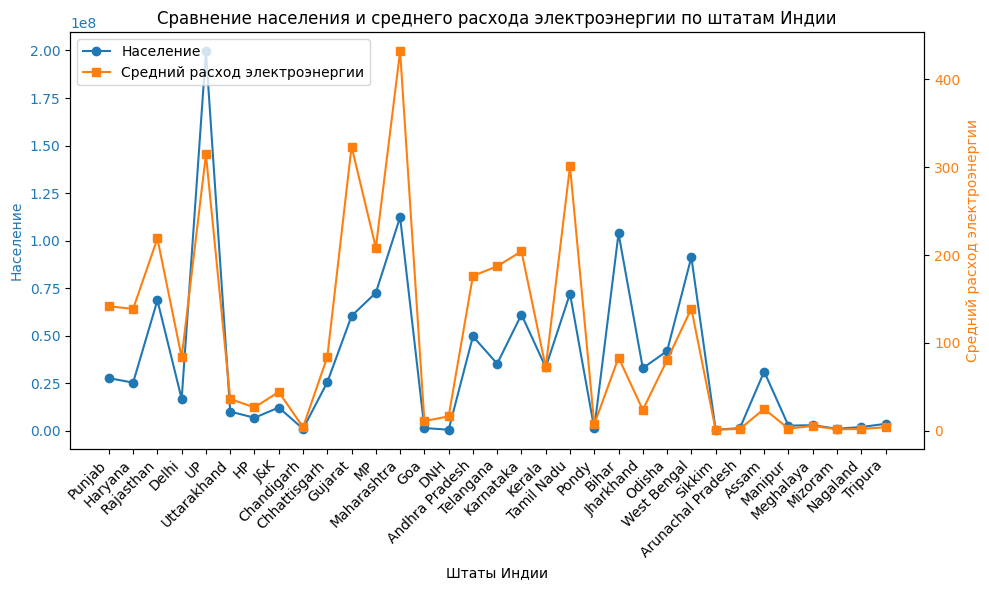

In [488]:
# Проверим зависимость населения каждого штата и расхода электроэнергии на графике.
x = dfPop['State']
y_population = dfPop['Population']
y_mean_electro = dfPop['meanElectro']

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(x, y_population, label='Население', marker='o', color='tab:blue') # Строим ось для населения по штату.
ax1.set_xlabel('Штаты Индии')
ax1.set_ylabel('Население', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')


ax2 = ax1.twinx() # Создаем вторую ось для отображения расходов электроэнергии, т.к. масштабы параметров очень разные.
ax2.plot(x, y_mean_electro, label='Средний расход электроэнергии', marker='s', color='tab:orange')
ax2.set_ylabel('Средний расход электроэнергии', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

ax1.set_xticklabels(x, rotation=45, ha='right')
ax2.set_xticklabels(x, rotation=45, ha='right')

plt.title('Сравнение населения и среднего расхода электроэнергии по штатам Индии')

plt.tight_layout()
plt.show()


In [489]:
# Также найдем коэффициент корреляции Пирсона для наших двух параметров, чтобы оценить статистическую зависимость
print(np.corrcoef(dfPop['Population'],dfPop['meanElectro'])[1,0])

0.7849117954648751


# Вывод

> Можем заметить, что прослеживается четкая зависимость между количеством населения и средним потреблением электроэнерергии.
Однако, в некоторых штатах расходы электроэнергии сильно выше чем в среднем по другим.

> В таких регионах, можно предположить, высокий уровень промышленности или иных расходов электроэнергии.

> Устойчивая зависимость также подтверждается нахождением коэффициента корреляции Пирсона (0.79), что говорит о том, что популяция прямым образом влияет на средний расход электроэнергии.

> Все задачи в рамках проекта были выполнены.







